In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
steel_industry_energy_consumption = fetch_ucirepo(id=851) 
  
# data (as pandas dataframes) 
X = steel_industry_energy_consumption.data.features 
y = steel_industry_energy_consumption.data.targets 
  
# metadata 
print(steel_industry_energy_consumption.metadata) 
  
# variable information 
print(steel_industry_energy_consumption.variables) 


{'uci_id': 851, 'name': 'Steel Industry Energy Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/851/data.csv', 'abstract': 'The data is collected from a smart small-scale steel industry in South Korea.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 35040, 'num_features': 9, 'feature_types': ['Real', 'Categorical'], 'demographics': [], 'target_col': ['Load_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2021, 'last_updated': 'Mon Aug 14 2023', 'dataset_doi': '10.24432/C52G8C', 'creators': ['Sathishkumar V E', 'Changsun Shin', 'Yongyun Cho'], 'intro_paper': {'ID': 262, 'type': 'NATIVE', 'title': 'Efficient energy consumption prediction model for a data analytic-enabled industry building in a smart city', 'authors': 'Sathishkumar V E, Changsun S

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score


In [89]:
X.shape

(35040, 9)

In [37]:
X.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week'],
      dtype='object')

In [39]:
X.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [41]:
y.describe()

,Load_Type
count,35040
unique,3
top,Light_Load
freq,18072


In [65]:
y.head()

,Load_Type
0,Light_Load
1,Light_Load
2,Light_Load
3,Light_Load
4,Light_Load


In [67]:
print(y.nunique())  # Gives the count of unique values

Load_Type    3
dtype: int64


In [73]:
y = y.replace({"Light_Load": 0, "Medium_Load": 1, "Maximum_Load": 2}).astype(int)

In [107]:
y = y.values.ravel()  # Convert to 1D array

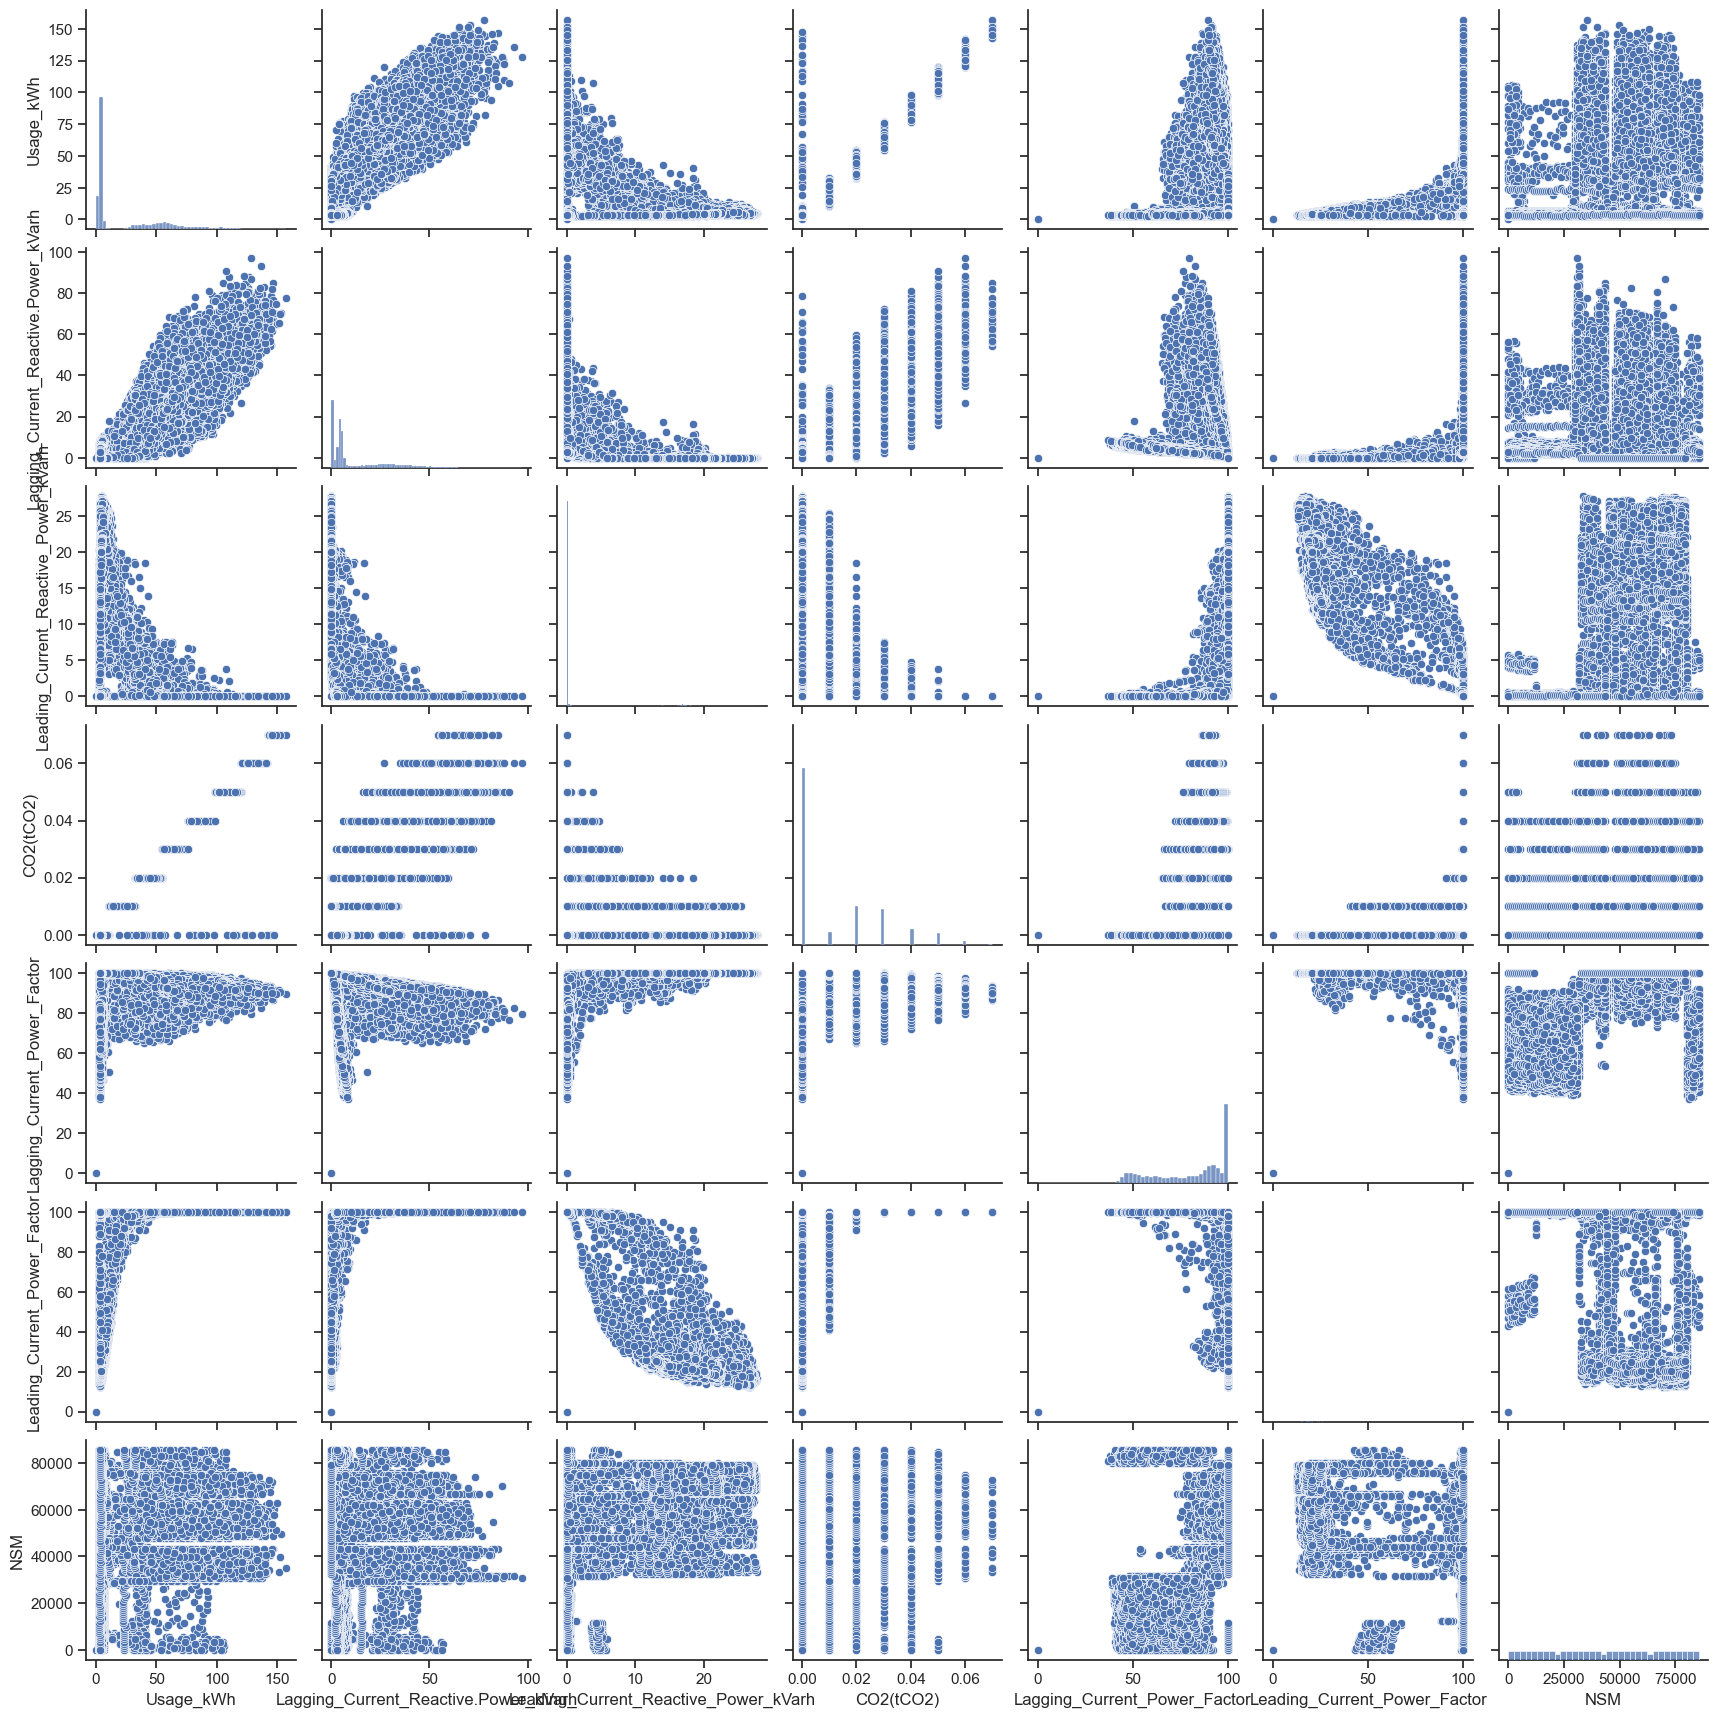

In [75]:
#check scatter plot matrix
sns.set_theme(style="ticks")
sns.pairplot(X)

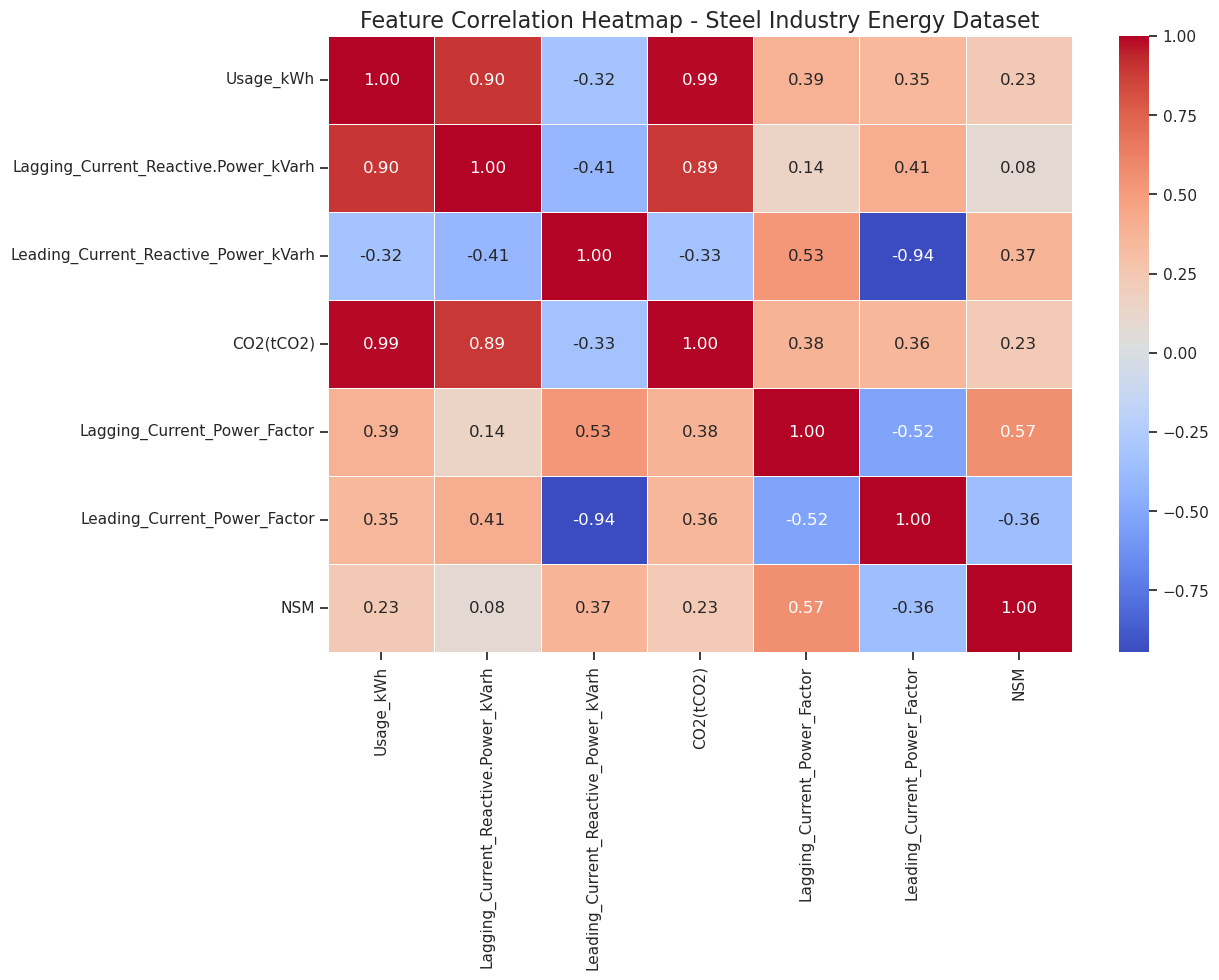

In [76]:
plt.rcParams["font.family"] = "DejaVu Sans"

# Select only numeric columns
X_numeric = X.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = X_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap - Steel Industry Energy Dataset", fontsize=16)
plt.show()

In [93]:
# Create and train the Linear Regression model
linear_model = Pipeline([("preprocessor", preprocessor), ("linear", LinearRegression())])
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate performance
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {linear_mse}")
print(f"Linear Regression R² Score: {linear_r2}")

Linear Regression MSE: 0.2726557263633375
Linear Regression R² Score: 0.5713641792842008


In [313]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Preprocessing pipeline: Standardize numerical & One-Hot Encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Ridge Regression
ridge_model = Pipeline([("preprocessor", preprocessor), ("ridge", Ridge(alpha=1.0))])
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Pipeline([("preprocessor", preprocessor), ("lasso", Lasso(alpha=0.1))])
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Principal Component Regression (PCR)
pca = PCA(n_components=5)
pcr_model = Pipeline([("preprocessor", preprocessor), ("pca", pca), ("ridge", Ridge(alpha=1.0))])
pcr_model.fit(X_train, y_train)
y_pred_pcr = pcr_model.predict(X_test)

# Partial Least Squares (PLS)
pls_model = Pipeline([("preprocessor", preprocessor), ("pls", PLSRegression(n_components=5))])
pls_model.fit(X_train, y_train)
y_pred_pls = pls_model.predict(X_test)

# Evaluate Models
results = {
    "Model": ["Ridge", "Lasso", "PCR", "PLS"],
    "MSE": [
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_pcr),
        mean_squared_error(y_test, y_pred_pls),
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_pcr),
        r2_score(y_test, y_pred_pls),
    ]
}

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

   Model       MSE  R2 Score
0  Ridge  0.264211  0.575153
1  Lasso  0.314652  0.494045
2    PCR  0.286111  0.539937
3    PLS  0.271472  0.563477


In [95]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Apply PCA before Ridge Regression
pca_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Standardize & encode categorical variables
    ("pca", PCA(n_components=5)),  # Reduce to 5 principal components
    ("ridge", Ridge(alpha=1.0))  # Use Ridge Regression on transformed features
])

# Train the model
pca_pipeline.fit(X_train, y_train)

# Predict
y_pred_pca = pca_pipeline.predict(X_test)

# Evaluate Performance
pca_mse = mean_squared_error(y_test, y_pred_pca)
pca_r2 = r2_score(y_test, y_pred_pca)

print(f"PCA + Ridge MSE: {pca_mse}")
print(f"PCA + Ridge R² Score: {pca_r2}")

PCA + Ridge MSE: 0.2945520192432269
PCA + Ridge R² Score: 0.53694151890443


In [97]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

ValueError: could not convert string to float: 'Weekday'

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["number"]).columns.tolist()

# Encode categorical variables
preprocessor = ColumnTransformer([
    ("num", "passthrough", numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

# Transform X
X_encoded = preprocessor.fit_transform(X)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=preprocessor.get_feature_names_out())
print(feature_importance.sort_values(ascending=False))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


num__NSM                                     0.595027
num__Usage_kWh                               0.279172
num__Leading_Current_Power_Factor            0.039881
num__Lagging_Current_Power_Factor            0.024611
num__Leading_Current_Reactive_Power_kVarh    0.019141
num__Lagging_Current_Reactive.Power_kVarh    0.017470
cat__Day_of_week_Sunday                      0.010759
cat__WeekStatus_Weekend                      0.002262
cat__Day_of_week_Wednesday                   0.002249
cat__Day_of_week_Tuesday                     0.002243
cat__Day_of_week_Monday                      0.002172
cat__Day_of_week_Thursday                    0.002138
cat__Day_of_week_Saturday                    0.001891
num__CO2(tCO2)                               0.000983
dtype: float64


In [315]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression Pipeline
log_reg_model = Pipeline([
    ("preprocessor", preprocessor),
    ("logistic", LogisticRegression(max_iter=1000, random_state=22))
])

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict
y_pred_logreg = log_reg_model.predict(X_test)

# Evaluate Performance
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7591
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      3592
           1       0.63      0.60      0.61      1984
           2       0.58      0.63      0.60      1432

    accuracy                           0.76      7008
   macro avg       0.71      0.71      0.71      7008
weighted avg       0.76      0.76      0.76      7008



In [329]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA Pipeline
lda_model = Pipeline([
    ("preprocessor", preprocessor),
    ("lda", LinearDiscriminantAnalysis())
])

# Train the model
lda_model.fit(X_train, y_train)

# Predict
y_pred_lda = lda_model.predict(X_test)

# Evaluate Performance
print(f"LDA Accuracy: {accuracy_score(y_test, y_pred_lda):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.7476
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      3592
           1       0.62      0.54      0.58      1984
           2       0.55      0.71      0.62      1432

    accuracy                           0.75      7008
   macro avg       0.70      0.71      0.70      7008
weighted avg       0.76      0.75      0.75      7008



In [117]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# QDA Pipeline
qda_model = Pipeline([
    ("preprocessor", preprocessor),
    ("qda", QuadraticDiscriminantAnalysis())
])

# Train the model
qda_model.fit(X_train, y_train)

# Predict
y_pred_qda = qda_model.predict(X_test)

# Evaluate Performance
print(f"QDA Accuracy: {accuracy_score(y_test, y_pred_qda):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_qda))

QDA Accuracy: 0.7156
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3572
           1       0.67      0.30      0.41      1937
           2       0.50      0.89      0.64      1499

    accuracy                           0.72      7008
   macro avg       0.69      0.68      0.64      7008
weighted avg       0.75      0.72      0.70      7008



/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [119]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Pipeline
knn_model = Pipeline([
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

# Train the model
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate Performance
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8770
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3572
           1       0.79      0.79      0.79      1937
           2       0.79      0.79      0.79      1499

    accuracy                           0.88      7008
   macro avg       0.85      0.85      0.85      7008
weighted avg       0.88      0.88      0.88      7008



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [142]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [144]:
from sklearn.model_selection import GridSearchCV

param_grid = {"knn__n_neighbors": [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(knn_model, param_grid, cv=5, scoring="accuracy")
knn_grid.fit(X_train, y_train)

print(f"Best K: {knn_grid.best_params_}")
print(f"Best Accuracy: {knn_grid.best_score_:.4f}")

Best K: {'knn__n_neighbors': 7}
Best Accuracy: 0.8827


In [146]:
best_knn_model = Pipeline([
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=7))
])

best_knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_best_knn = best_knn_model.predict(X_test)

# Evaluate performance
print(f"KNN (k=7) Accuracy: {accuracy_score(y_test, y_pred_best_knn):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best_knn))

KNN (k=7) Accuracy: 0.8809
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3572
           1       0.80      0.80      0.80      1937
           2       0.80      0.80      0.80      1499

    accuracy                           0.88      7008
   macro avg       0.85      0.85      0.85      7008
weighted avg       0.88      0.88      0.88      7008



In [321]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Pipeline
rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=22))
])

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate Performance
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9092
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3592
           1       0.86      0.84      0.85      1984
           2       0.82      0.84      0.83      1432

    accuracy                           0.91      7008
   macro avg       0.88      0.88      0.88      7008
weighted avg       0.91      0.91      0.91      7008



In [150]:
from xgboost import XGBClassifier

# XGBoost Pipeline
xgb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("xgboost", XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="mlogloss"))
])

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Performance
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:57:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9054
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3572
           1       0.85      0.82      0.83      1937
           2       0.81      0.85      0.83      1499

    accuracy                           0.91      7008
   macro avg       0.88      0.88      0.88      7008
weighted avg       0.91      0.91      0.91      7008



In [154]:
from xgboost import XGBClassifier

# XGBoost Pipeline without use_label_encoder
xgb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("xgboost", XGBClassifier(n_estimators=100, random_state=42, eval_metric="logloss"))
])

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Performance
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9054
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3572
           1       0.85      0.82      0.83      1937
           2       0.81      0.85      0.83      1499

    accuracy                           0.91      7008
   macro avg       0.88      0.88      0.88      7008
weighted avg       0.91      0.91      0.91      7008



In [156]:
from sklearn.svm import SVC

# SVM Pipeline
svm_model = Pipeline([
    ("preprocessor", preprocessor),
    ("svm", SVC(kernel="rbf", C=1.0, gamma="scale"))
])

# Train SVM
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate Performance
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7282
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86      3572
           1       0.58      0.63      0.60      1937
           2       0.55      0.69      0.61      1499

    accuracy                           0.73      7008
   macro avg       0.69      0.71      0.69      7008
weighted avg       0.76      0.73      0.74      7008



In [158]:
from pygam import LogisticGAM

# Train Spline-based Model
gam = LogisticGAM().fit(X_train, y_train)

# Predict
y_pred_gam = gam.predict(X_test)

# Evaluate Performance
print(f"GAM Accuracy: {accuracy_score(y_test, y_pred_gam):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_gam))

ValueError: y data is not in domain of logit link function. Expected domain: [0.0, 1.0], but found [0.0, 2.0]

In [166]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Identify numeric columns (excluding categorical ones)
numeric_features = X.select_dtypes(include=["number"]).columns.tolist()

# Preprocessing: Apply Polynomial Features + Standardization to numeric data
preprocessor_poly = ColumnTransformer([
    ("poly", Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler())  # Standardize after polynomial expansion
    ]), numeric_features),
    ("cat", preprocessor, X.columns)  # Keep the original categorical transformation
])

# Polynomial Logistic Regression Pipeline
poly_logreg = Pipeline([
    ("preprocessor", preprocessor_poly),
    ("logreg", LogisticRegression(max_iter=1000))  # Increase max_iter
])

# Train Model
poly_logreg.fit(X_train, y_train)
y_pred_poly = poly_logreg.predict(X_test)

# Evaluate Performance
print(f"Polynomial Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_poly):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_poly))

Polynomial Logistic Regression Accuracy: 0.7392
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      3572
           1       0.62      0.53      0.57      1937
           2       0.57      0.60      0.59      1499

    accuracy                           0.74      7008
   macro avg       0.68      0.68      0.68      7008
weighted avg       0.73      0.74      0.73      7008



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

# Identify categorical columns
categorical_features = ["WeekStatus", "Day_of_week"]

# Define transformer: OneHotEncoder for categorical, passthrough for numerical
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_features)
], remainder="passthrough")

# Transform X_train and X_test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train Decision Tree Model
clf = DecisionTreeClassifier(max_depth=3, random_state=22)
clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=3, random_state=22)

In [185]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# Train Decision Tree on our dataset
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth for better visualization
clf.fit(X_train, y_train)

# Create visualization
dot_data = StringIO()
export_graphviz(
    clf, 
    out_file=dot_data,  
    filled=True, rounded=True,
    special_characters=True,
    feature_names=X.columns, 
    class_names=["Light Load", "Medium Load", "Maximum Load"]
)

# Generate tree image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("decision_tree.png")

# Display tree image
Image(graph.create_png())

ValueError: could not convert string to float: 'Weekend'

In [198]:
# Replace 'WeekStatus' with binary values
X_train["WeekStatus"] = X_train["WeekStatus"].map({"Weekday": 0, "Weekend": 1})
X_test["WeekStatus"] = X_test["WeekStatus"].map({"Weekday": 0, "Weekend": 1})

# Replace 'Day_of_week' with numerical values (1=Monday, 7=Sunday)
day_mapping = {
    "Monday": 1, "Tuesday": 2, "Wednesday": 3, 
    "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7
}

X_train["Day_of_week"] = X_train["Day_of_week"].map(day_mapping)
X_test["Day_of_week"] = X_test["Day_of_week"].map(day_mapping)

# Ensure no missing values exist after mapping
print(X_train.isna().sum(), X_test.isna().sum())

# Now, try fitting the model again
rf.fit(X_train, y_train)

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
dtype: int64 Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
dtype: int64


RandomForestClassifier(random_state=42)

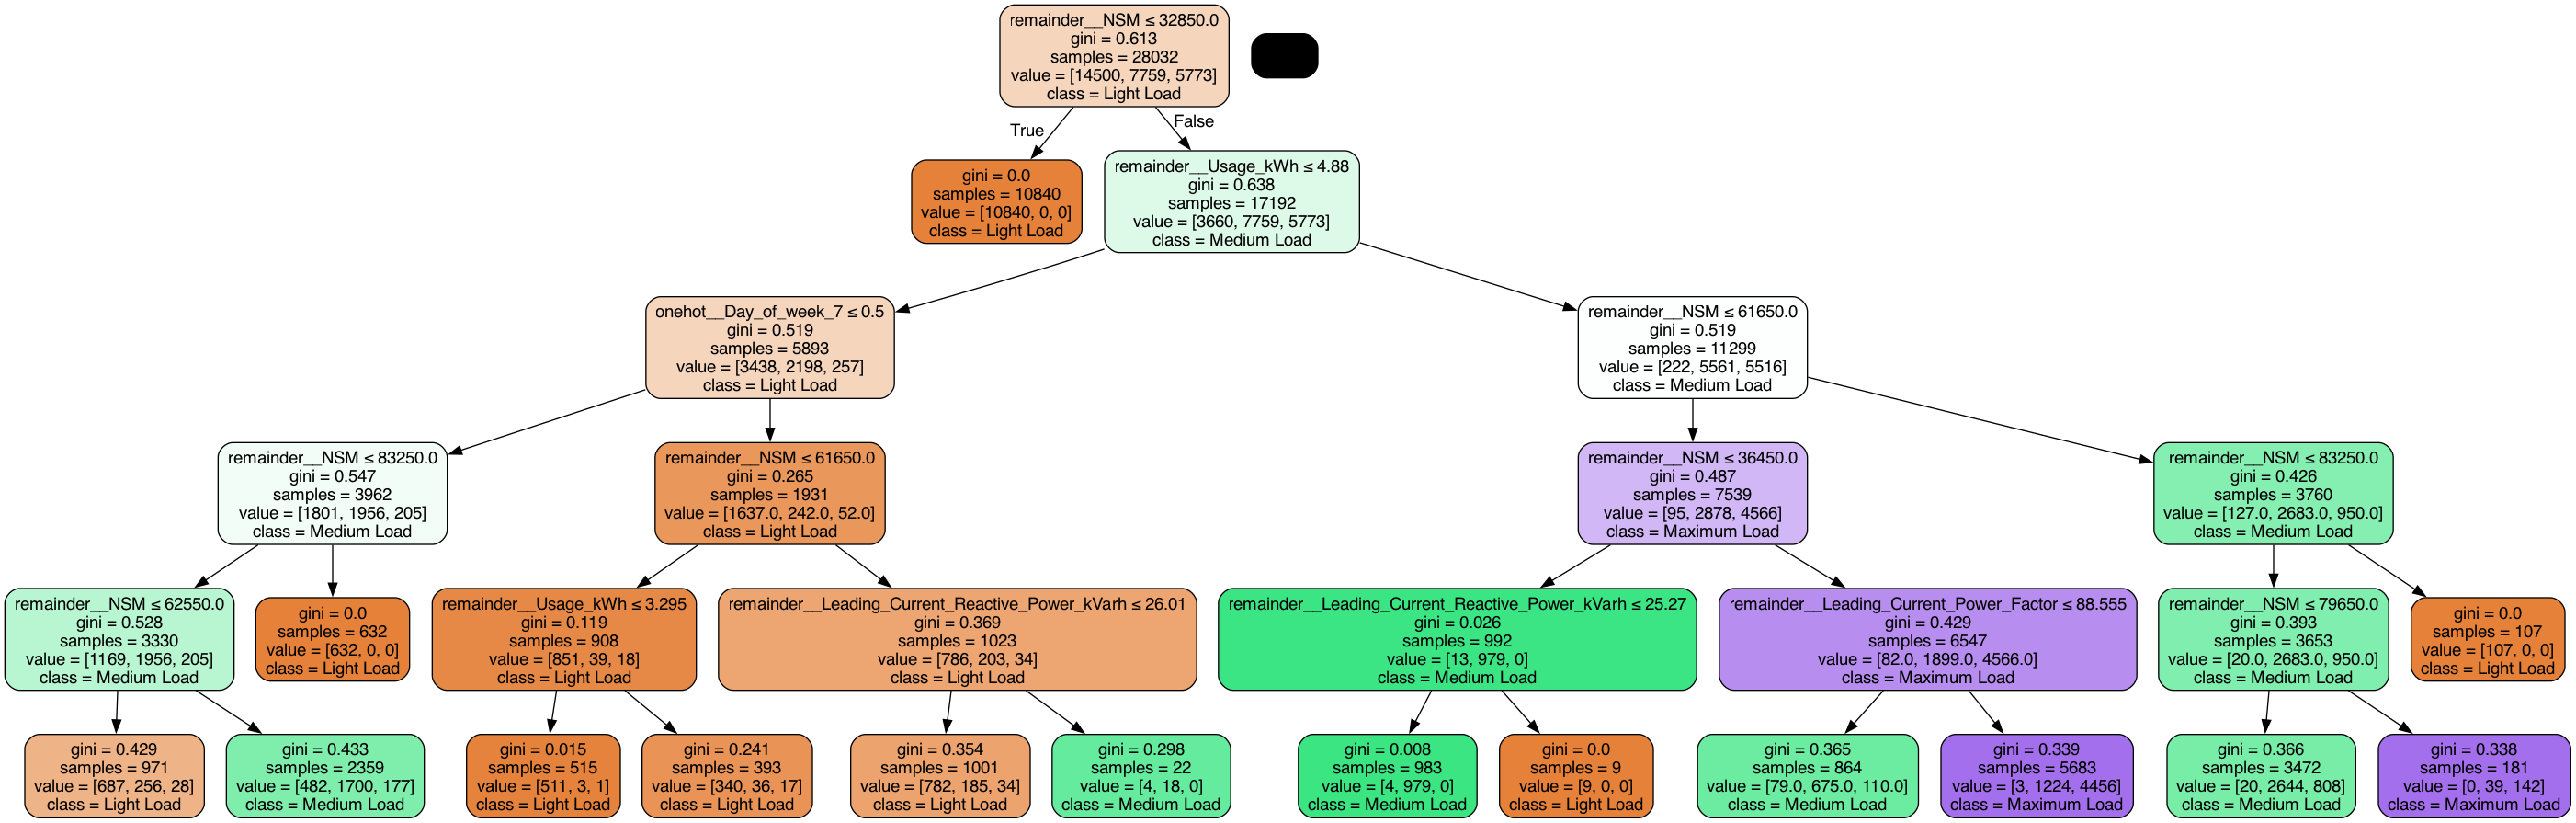

In [288]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from six import StringIO  
from IPython.display import Image  
import pydotplus
import numpy as np
import pandas as pd

# Ensure y_train is a 1D array
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Identify categorical columns
categorical_features = ["WeekStatus", "Day_of_week"]

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_features)
], remainder="passthrough")

# Define Decision Tree pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Fit model
model.fit(X_train, y_train)

# Extract trained decision tree
clf = model.named_steps["classifier"]

# Generate feature names after encoding
feature_names = model.named_steps["preprocessor"].get_feature_names_out()

# Create visualization
dot_data = StringIO()
export_graphviz(
    clf, 
    out_file=dot_data,  
    filled=True, rounded=True,
    special_characters=True,
    feature_names=feature_names,  # Use transformed feature names
    class_names=["Light Load", "Medium Load", "Maximum Load"]
)

# Generate tree image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("decision_tree.png")

# Display tree image
Image(graph.create_png())

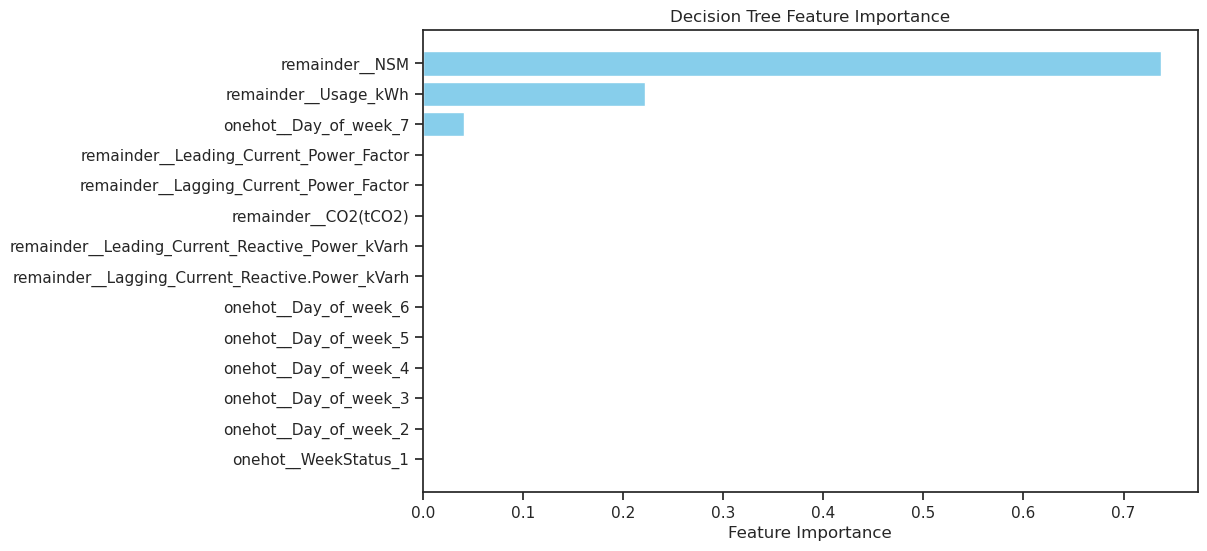

In [202]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = clf.feature_importances_

# Get feature names from preprocessing
feature_names = model.named_steps["preprocessor"].get_feature_names_out()

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()  # Invert so highest importance is at top
plt.show()

In [309]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=22)
rf.fit(X_train, y_train)

# Check Accuracy
rf_acc = rf.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9061


In [196]:
X_train.head()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
9284,4.18,0.00,21.78,0.00,100.00,18.85,62100,Weekend,Saturday
14314,2.92,4.93,0.00,0.00,50.96,100.00,9900,Weekday,Wednesday
5094,6.44,7.34,0.00,0.00,65.95,100.00,6300,Weekday,Friday
33269,56.92,22.28,0.00,0.03,93.12,100.00,48600,Weekday,Thursday
9994,3.10,3.82,0.00,0.00,63.01,100.00,9900,Weekend,Sunday


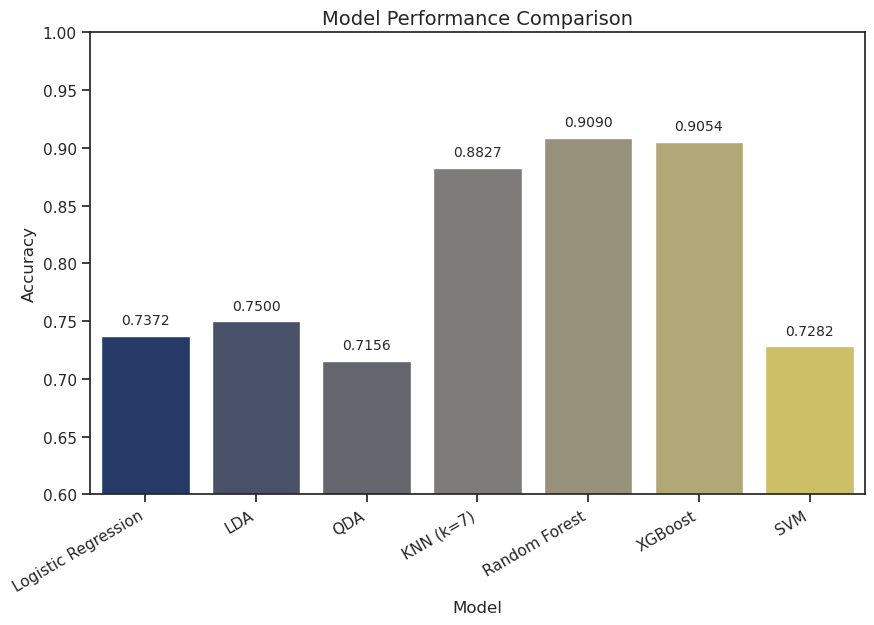

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their corresponding accuracies
models = ["Logistic Regression", "LDA", "QDA", "KNN (k=7)", "Random Forest", "XGBoost", "SVM"]
accuracies = [0.7372, 0.75, 0.7156, 0.8827, 0.9090, 0.9054, 0.7282]  # Update with actual values

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="cividis")

# Add labels and title
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14)
plt.xticks(rotation=30, ha="right")  # Rotate x labels for readability
plt.ylim(0.6, 1)  # Set y-axis range for better visualization

# Annotate bars with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha="center", fontsize=10)

plt.show()

In [222]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Store feature importances across multiple runs
n_runs = 10  # Train model multiple times
feature_importances = []

for _ in range(n_runs):
    rf = RandomForestClassifier(n_estimators=100, random_state=None)
    rf.fit(X_train, y_train)
    feature_importances.append(rf.feature_importances_)

# Convert to DataFrame
feature_importances_df = pd.DataFrame(feature_importances, columns=X_train.columns)

# Compute standard deviation across runs
importance_std = feature_importances_df.std()

# Show features with high variance
print(importance_std.sort_values(ascending=False))

NSM                                     0.009297
Usage_kWh                               0.008636
Lagging_Current_Power_Factor            0.006478
CO2(tCO2)                               0.005680
Lagging_Current_Reactive.Power_kVarh    0.005577
Leading_Current_Reactive_Power_kVarh    0.001973
Leading_Current_Power_Factor            0.001825
Day_of_week                             0.001586
WeekStatus                              0.001006
dtype: float64


/var/folders/y9/k67ghyzd7jvdcd1kddk70p5c0000gn/T/ipykernel_18238/974524736.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index, palette="viridis")


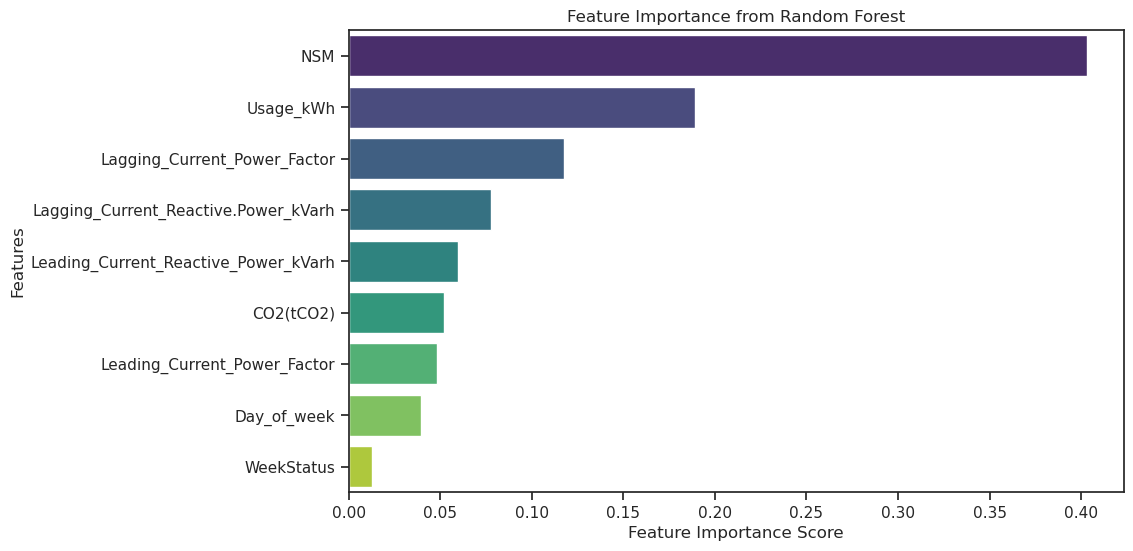

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()

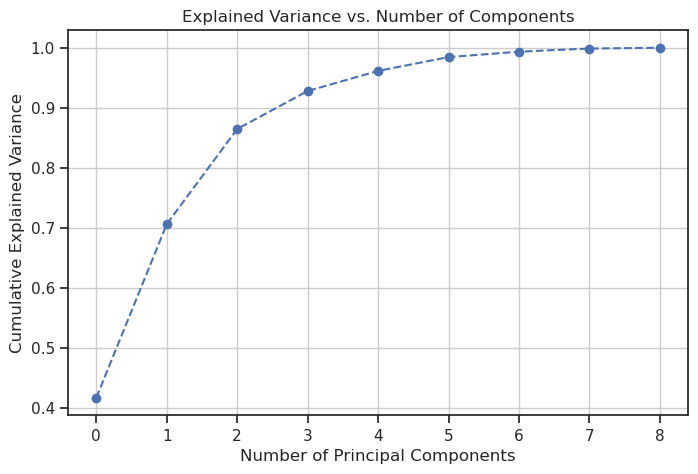

In [230]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Standardize X before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # X is your feature matrix

# Run PCA
pca = PCA().fit(X_scaled)

# Explained variance plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [339]:
X_test.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
12136,83.02,33.91,0.00,0.04,92.58,100.00,36900,Weekday,Monday
15633,79.42,24.05,0.00,0.04,95.71,100.00,73800,Weekday,Tuesday
15791,98.86,53.42,0.00,0.05,87.98,100.00,43200,Weekday,Thursday
33836,140.80,69.77,0.00,0.06,89.60,100.00,40500,Weekday,Wednesday
8999,30.85,6.19,9.11,0.01,98.05,95.91,64800,Weekday,Wednesday


In [341]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Directly replace categorical values with numerical ones
X_train = X_train.replace({"WeekStatus": {"Weekday": 0, "Weekend": 1}})
X_test = X_test.replace({"WeekStatus": {"Weekday": 0, "Weekend": 1}})

X_train = X_train.replace({"Day_of_week": {"Monday": 1, "Tuesday": 2, "Wednesday": 3, 
                                           "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}})
X_test = X_test.replace({"Day_of_week": {"Monday": 1, "Tuesday": 2, "Wednesday": 3, 
                                         "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}})

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Logistic Regression on original data
logreg_original = LogisticRegression(max_iter=500, random_state=22)
logreg_original.fit(X_train_scaled, y_train)
y_pred_original = logreg_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Train Logistic Regression on PCA-transformed data
logreg_pca = LogisticRegression(max_iter=500, random_state=22)
logreg_pca.fit(X_train_pca, y_train)
y_pred_pca = logreg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Print results
print(f"Logistic Regression Accuracy (Original Data): {accuracy_original:.4f}")
print(f"Logistic Regression Accuracy (After PCA, 3 Components): {accuracy_pca:.4f}")›

/var/folders/y9/k67ghyzd7jvdcd1kddk70p5c0000gn/T/ipykernel_18238/778301737.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.replace({"WeekStatus": {"Weekday": 0, "Weekend": 1}})
/var/folders/y9/k67ghyzd7jvdcd1kddk70p5c0000gn/T/ipykernel_18238/778301737.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.replace({"WeekStatus": {"Weekday": 0, "Weekend": 1}})
/var/folders/y9/k67ghyzd7jvdcd1kddk70p5c0000gn/T/ipykernel_18238/778301737.py:10: FutureWarning: Downcasting behavior in `replace` is deprec

Logistic Regression Accuracy (Original Data): 0.7561
Logistic Regression Accuracy (After PCA, 3 Components): 0.7205


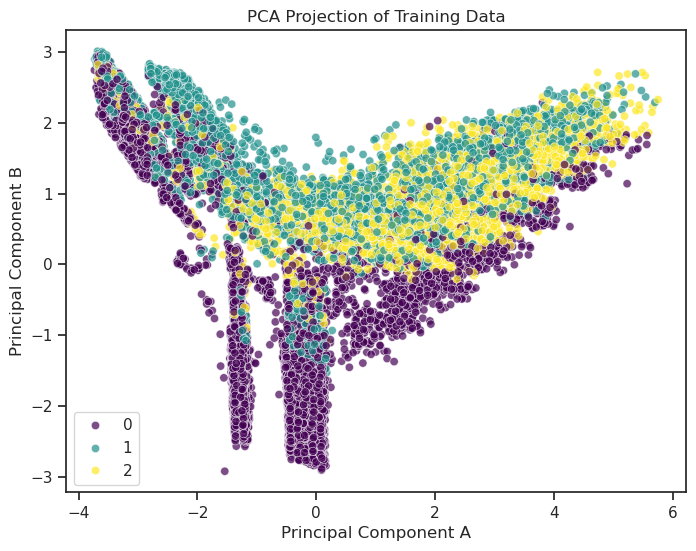

In [266]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Run PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train_scaled)

# Scatterplot with matched sizes
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette="viridis", alpha=0.7)
plt.xlabel("Principal Component A")
plt.ylabel("Principal Component B")
plt.title("PCA Projection of Training Data")
plt.show()

In [254]:
print(X_pca.shape, y.shape)

(28032, 2) (35040,)


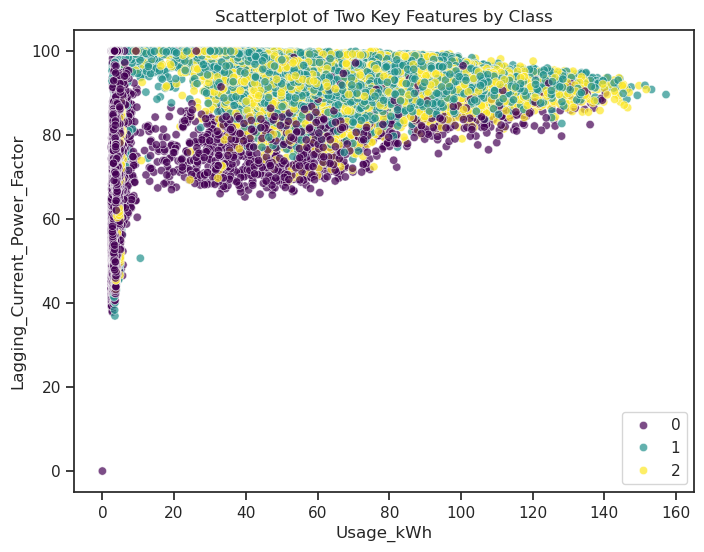

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=X["Usage_kWh"], y=X["Lagging_Current_Power_Factor"], hue=y, palette="viridis", alpha=0.7)
plt.xlabel("Usage_kWh")
plt.ylabel("Lagging_Current_Power_Factor")
plt.title("Scatterplot of Two Key Features by Class")
plt.show()

In [272]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create an SVM pipeline with scaling
svm = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm", SVC(kernel="rbf", C=1, gamma="scale", random_state=22))
])

# Train & evaluate SVM on original data
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

svm_acc_original = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (Original Data): {svm_acc_original:.4f}")

SVM Accuracy (Original Data): 0.8126


In [343]:
from sklearn.decomposition import PCA

# Apply PCA (choose optimal number of components from explained variance plot)
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)  # Use standardized data
X_test_pca = pca.transform(X_test_scaled)

# Train & evaluate SVM after PCA
svm_pca = SVC(kernel="rbf", C=1, gamma="scale", random_state=22)
svm_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca)

svm_acc_pca = accuracy_score(y_test, y_pred_svm_pca)
print(f"SVM Accuracy (After PCA, 3 Components): {svm_acc_pca:.4f}")

SVM Accuracy (After PCA, 3 Components): 0.7800


In [278]:
X.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week'],
      dtype='object')

In [282]:
y.columns()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [291]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Train a simple Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Print tree structure
print(export_text(tree_clf, feature_names=list(X.columns)))

|--- NSM <= 32850.00
|   |--- class: 0
|--- NSM >  32850.00
|   |--- Usage_kWh <= 4.88
|   |   |--- Day_of_week <= 6.50
|   |   |   |--- class: 1
|   |   |--- Day_of_week >  6.50
|   |   |   |--- class: 0
|   |--- Usage_kWh >  4.88
|   |   |--- NSM <= 61650.00
|   |   |   |--- class: 2
|   |   |--- NSM >  61650.00
|   |   |   |--- class: 1



In [293]:
from sklearn.metrics import accuracy_score

y_pred_tree = tree_clf.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {tree_accuracy:.4f}")

Decision Tree Accuracy: 0.7638


In [295]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=list(X.columns), 
                           class_names=["Low", "Medium", "High"], 
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Decision_Tree")
graph.view()

'Decision_Tree.pdf'

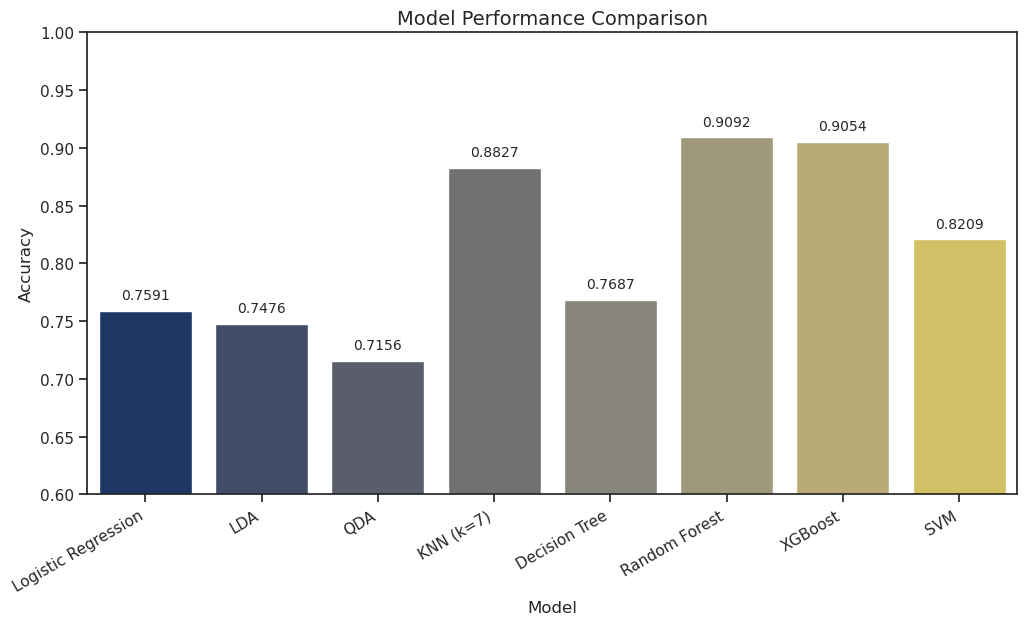

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their corresponding accuracies
models = ["Logistic Regression", "LDA", "QDA", "KNN (k=7)", "Decision Tree", "Random Forest", "XGBoost", "SVM"]
accuracies = [0.7591, 0.7476, 0.7156, 0.8827, 0.7687, 0.9092, 0.9054, 0.8209]  # Update Decision Tree accuracy

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="cividis")

# Add labels and title
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14)
plt.xticks(rotation=30, ha="right")  # Rotate x labels for readability
plt.ylim(0.6, 1)  # Set y-axis range for better visualization

# Annotate bars with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha="center", fontsize=10)

plt.show()

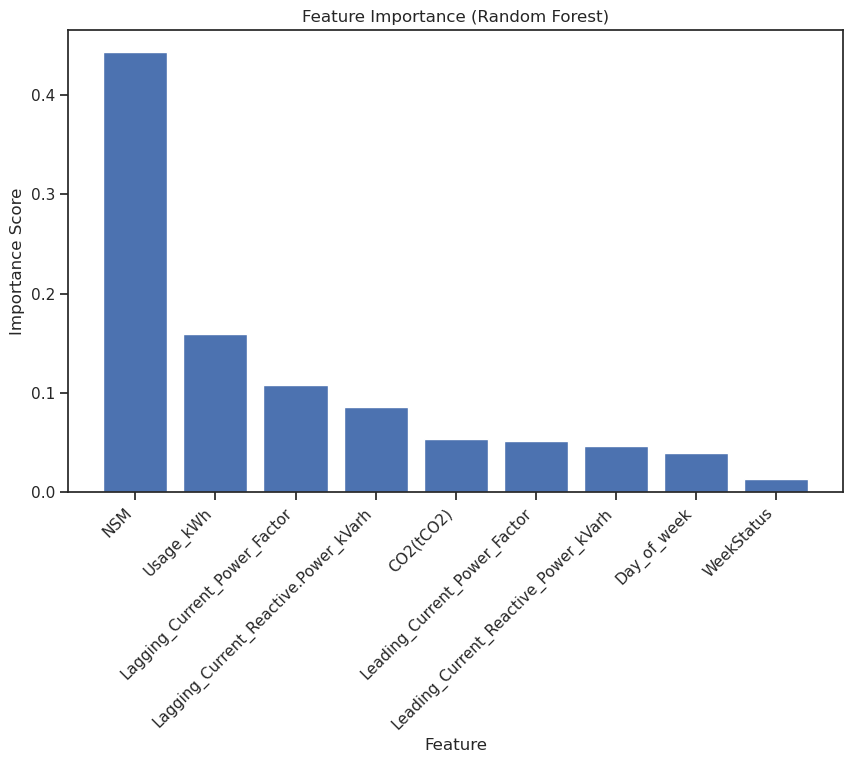

In [346]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
feature_importance = rf.feature_importances_  # Assuming 'rf' is your trained Random Forest model

# Feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Sort feature importance in descending order for better visualization
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [348]:
import xgboost as xgb

# Assuming 'xgb_model' is your trained XGBoost model
xgb.plot_importance(xgb_model, importance_type="weight", title="Feature Importance (XGBoost)")
plt.show()

ValueError: tree must be Booster, XGBModel or dict instance

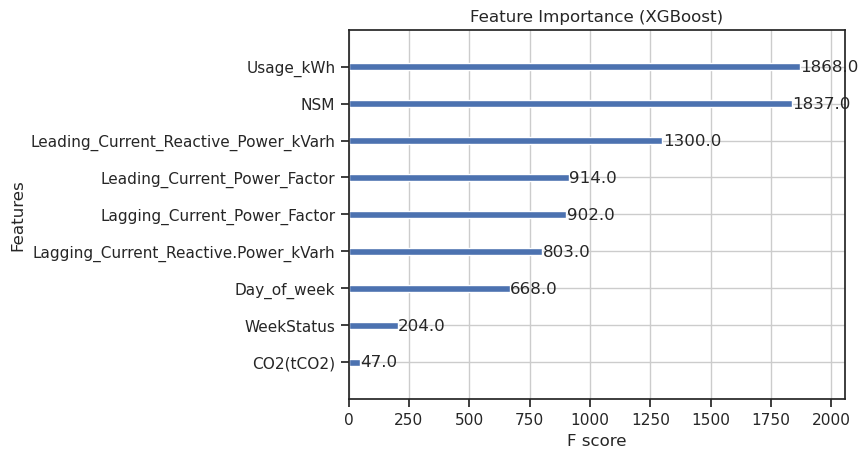

In [350]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Now, plot the importance
xgb.plot_importance(xgb_model, importance_type="weight")
plt.title("Feature Importance (XGBoost)")
plt.show()

In [362]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM pipeline with scaling
svm = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm", SVC(kernel="linear", C=1, gamma="scale", random_state=22))
])

# Train & evaluate SVM on original data
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Accuracy
svm_acc_original = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc_original:.4f}")

# Classification Report
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7704

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3592
           1       0.65      0.58      0.62      1984
           2       0.61      0.69      0.64      1432

    accuracy                           0.77      7008
   macro avg       0.72      0.73      0.72      7008
weighted avg       0.77      0.77      0.77      7008



In [358]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=22)  # Adjust depth if needed
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_clf.predict(X_test)

# Accuracy
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {tree_accuracy:.4f}")

# Classification Report
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.7687

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      3592
           1       0.60      0.61      0.60      1984
           2       0.60      0.78      0.68      1432

    accuracy                           0.77      7008
   macro avg       0.73      0.75      0.73      7008
weighted avg       0.79      0.77      0.78      7008

